In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio
from pandas.api.types import is_numeric_dtype

import sys
sys.path.append('../')
import default_style

TS_DATASET_FOLDER = os.path.join("..", "dataset")
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, "preprocessed_traces")
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, "preproc_ts.df")

INTERESTING_TRACES = ["syllables_fourier"]

## Save folder for long-run estimators
ESTIMATORS_FOLDER = os.path.join("..", "estimators")

### Import

In [18]:
traces = dict()
for int_tr in INTERESTING_TRACES:
    traces[int_tr] = np.load(os.path.join(TS_PREPROC_FOLDER, f"{int_tr}.npy"))
print(traces["syllables_fourier"].shape)
traces["syll_labels"] = np.repeat(np.arange(7), len(traces["syllables_fourier"])//7)
print(traces["syll_labels"].shape)

(17164, 1000)
(17164,)


In [32]:
from umap import UMAP
from sklearn.manifold import Isomap
M = 10_000
who = np.random.randint(len(traces["syllables_fourier"]), size=M)
reducer = Isomap(n_neighbors=20)
embedding = reducer.fit_transform(traces["syllables_fourier"][who])

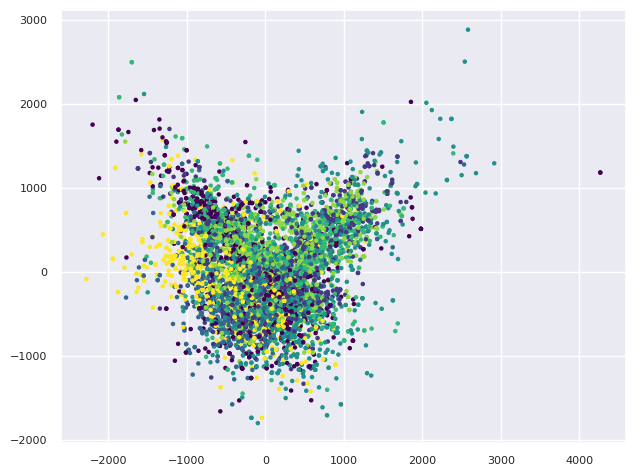

In [33]:
plt.scatter(*embedding.T, s=5, c=traces["syll_labels"][who], cmap="viridis")